In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/united_data/db/united_data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(path, sep=';')

In [5]:
data.head()

,Jogador,Clube,Temporada,Minutos Jogados,Gols,Ass,GCC,Gols/90',Ass/90',GCC/90',NS
0,Antony,Man United,24/25,427,1,0,1,0.2,0.0,0.2,6.83
1,Antony,Man United,23/24,1347,1,1,7,0.1,0.1,0.5,6.96
2,Antony,Real Betis,24/25,1364,5,2,8,0.3,0.1,0.5,7.47
3,Rashford,Man United,24/25,1501,7,3,6,0.4,0.2,0.4,7.04
4,Rashford,Aston Villa,24/25,940,4,5,11,0.4,0.5,1.1,7.24


In [6]:
player_colors = {
    'Antony': (0, 122, 51),        # Real Betis (verde)
    'Rashford': (152, 0, 46),      # Aston Villa (claret)
    'Lukaku': (19, 55, 124),       # Internazionale (azul)
    'McTominay': (0, 95, 189),     # Napoli (azzurro)
    'Elanga': (229, 0, 14)         # Nottingham Forest (vermelho)
}

In [7]:
data['Participacao Gols/90'] = ((data['Gols'] + data['Ass']) * 90) / data['Minutos Jogados']

In [8]:
data.head()

,Jogador,Clube,Temporada,Minutos Jogados,Gols,Ass,GCC,Gols/90',Ass/90',GCC/90',NS,Participacao Gols/90
0,Antony,Man United,24/25,427,1,0,1,0.2,0.0,0.2,6.83,0.210773
1,Antony,Man United,23/24,1347,1,1,7,0.1,0.1,0.5,6.96,0.133630
2,Antony,Real Betis,24/25,1364,5,2,8,0.3,0.1,0.5,7.47,0.461877
3,Rashford,Man United,24/25,1501,7,3,6,0.4,0.2,0.4,7.04,0.599600
4,Rashford,Aston Villa,24/25,940,4,5,11,0.4,0.5,1.1,7.24,0.861702


In [9]:
data.columns

Index(['Jogador', 'Clube', 'Temporada', 'Minutos Jogados', 'Gols', 'Ass',
       'GCC', 'Gols/90'', 'Ass/90'', 'GCC/90'', 'NS', 'Participacao Gols/90'],
      dtype='object')

In [10]:
comp = data.groupby('Jogador')['Participacao Gols/90'].agg(['mean']).rename(columns={'mean': 'United_pa90'})
comp['PosUnited_pa90'] = data.loc[data['Clube'] != 'Man United'].groupby('Jogador')['Participacao Gols/90'].agg(['mean']).rename(columns={'mean': 'PosUnited_pa90'})
comp = comp.fillna(0) # Fill potential NaN values if a player only played for United

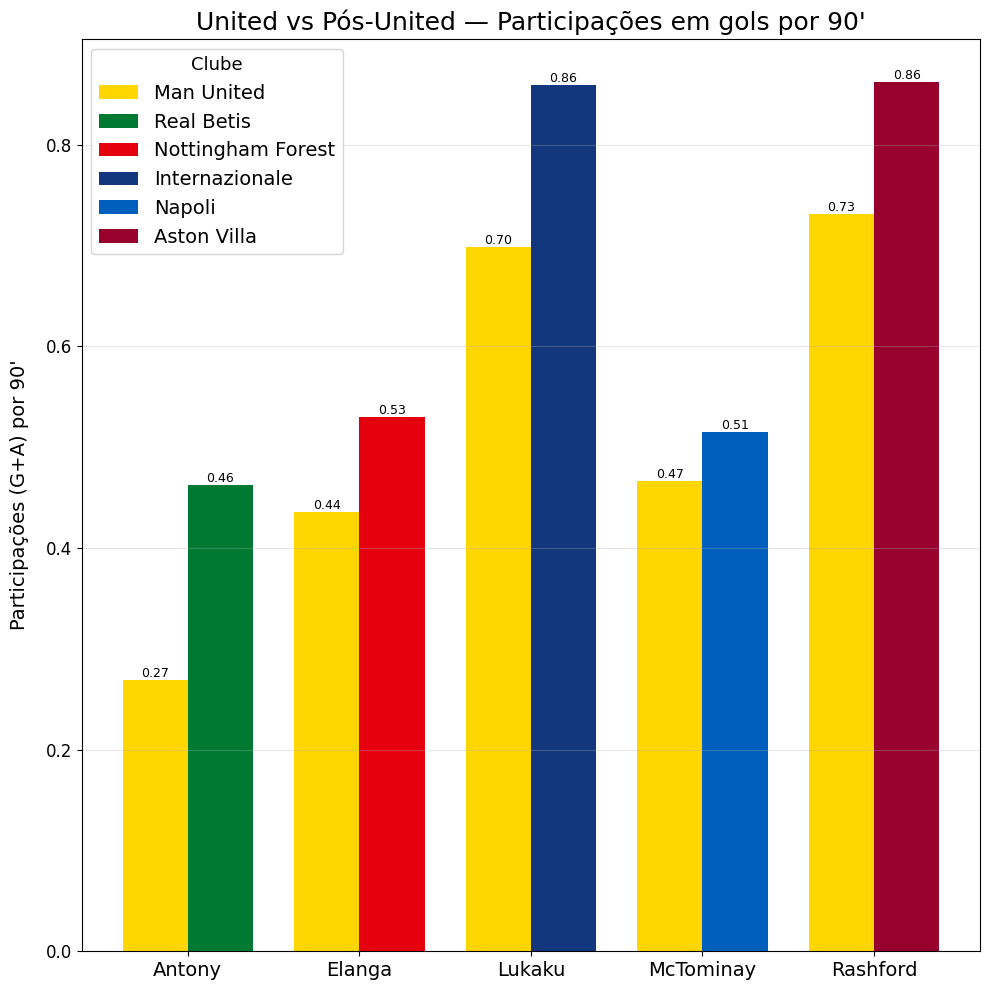

In [11]:
players = comp.index.tolist()
x = np.arange(len(players))
w = 0.38

plt.figure(figsize=(10,10))

# United em amarelo (fixo)
plt.bar(x - w/2, comp["United_pa90"], width=w, color=(1.0, 0.84, 0.0), label="Man United")

# construir legenda dos clubes pós-United
clubes_pos = {}
for p in players:
    clubes = data.loc[(data["Jogador"]==p) & (data["Clube"]!="Man United"), "Clube"].unique()
    if len(clubes) > 0:
        clubes_pos[p] = clubes[0]

# barras pós-United com rótulo individual por clube
for xi, p in enumerate(players):
    plt.bar(xi + w/2, comp.loc[p, "PosUnited_pa90"], width=w,
            color=tuple(c/255 for c in player_colors[p]),
            label=clubes_pos.get(p, "Pós-United"))

plt.xticks(x, players)
plt.ylabel("Participações (G+A) por 90'")
plt.title("United vs Pós-United — Participações em gols por 90'")
plt.grid(True, axis="y", alpha=0.3)
plt.legend(title="Clube")

# valores nas barras
for xi, v in zip(x - w/2, comp["United_pa90"]):
    plt.text(xi, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)
for xi, v in zip(x + w/2, comp["PosUnited_pa90"]):
    plt.text(xi, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)

plt.title("United vs Pós-United — Participações em gols por 90'",
          fontsize=18)  # título maior

plt.ylabel("Participações (G+A) por 90'",
           fontsize=14, labelpad=12)  # eixo Y

plt.xticks(x, players, fontsize=14)  # rótulos do eixo X
plt.yticks(fontsize=12)              # rótulos do eixo Y
plt.legend(title="Clube", fontsize=14, title_fontsize=13)


plt.tight_layout()
plt.show()


In [12]:
# Montar o df_plot (última temporada no United e primeira fora)
jogadores_united = data.query("Clube == 'Man United'")["Jogador"].unique()
registros = []

for j in jogadores_united:
    df_u = data[(data["Jogador"]==j) & (data["Clube"]=="Man United")].sort_values("Temporada")
    if df_u.empty:
        continue
    ult_u = df_u.iloc[-1]

    df_o = data[(data["Jogador"]==j) & (data["Clube"]!="Man United")].sort_values("Temporada")
    if df_o.empty:
        continue
    prim_o = df_o.iloc[0]

    registros.append({
        "Jogador": j,
        "NS_United": float(ult_u["NS"]),
        "NS_Fora": float(prim_o["NS"])
    })

df_plot = pd.DataFrame(registros)

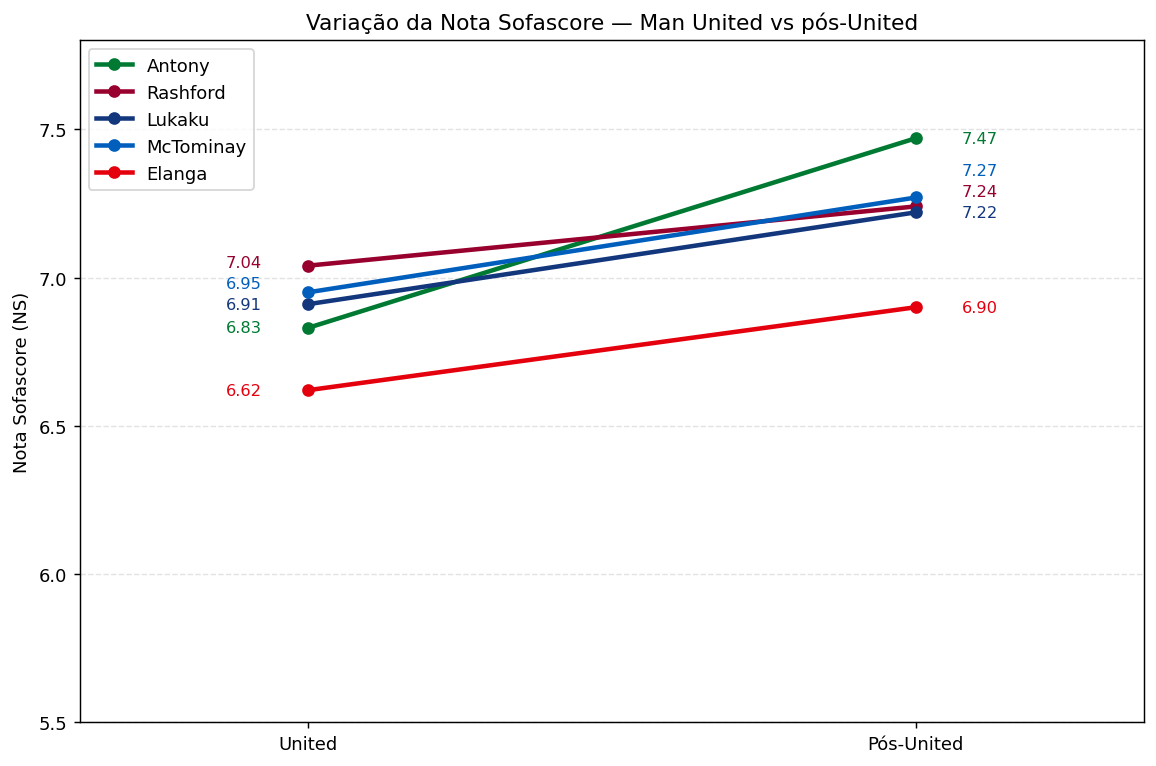

In [13]:
# cores já normalizadas 0–1
player_colors = {k: tuple(c/255 for c in v) for k,v in {
    'Antony': (0, 122, 51),
    'Rashford': (152, 0, 46),
    'Lukaku': (19, 55, 124),
    'McTominay': (0, 95, 189),
    'Elanga': (229, 0, 14)
}.items()}

plt.figure(figsize=(9,6), dpi=130)

xpos = [-0.2, 0.2]
xticks = ["United", "Pós-United"]

# função que espalha se os rótulos estiverem muito próximos
def adjust_positions(y_values, min_gap=0.04):
    y_sorted = np.sort(y_values)
    adjusted = y_sorted.copy()
    for i in range(1, len(adjusted)):
        if adjusted[i] - adjusted[i-1] < min_gap:
            adjusted[i] = adjusted[i-1] + min_gap
    # mapear de volta para a ordem original
    mapping = {y: adj for y, adj in zip(y_sorted, adjusted)}
    return [mapping[v] for v in y_values]

# valores originais
y_left  = df_plot["NS_United"].to_numpy()
y_right = df_plot["NS_Fora"].to_numpy()

# corrigir posições se necessário
adj_left  = adjust_positions(y_left,  min_gap=0.07)
adj_right = adjust_positions(y_right, min_gap=0.07)

for i, r in df_plot.reset_index(drop=True).iterrows():
    c = player_colors.get(r["Jogador"], "gray")
    y0, y1 = r["NS_United"], r["NS_Fora"]

    # linha
    plt.plot(xpos, [y0, y1], color=c, marker="o", linewidth=2.5, markersize=6, label=r["Jogador"])

    # rótulos laterais (usando posição ajustada)
    plt.text(xpos[0]-0.03, adj_left[i], f"{y0:.2f}", ha="right", va="center", fontsize=9, color=c)
    plt.text(xpos[1]+0.03, adj_right[i], f"{y1:.2f}", ha="left", va="center", fontsize=9, color=c)

# estética
plt.ylim(5.5, 7.8)
plt.xlim(-0.35, 0.35)
plt.xticks(xpos, xticks)
plt.ylabel("Nota Sofascore (NS)")
plt.title("Variação da Nota Sofascore — Man United vs pós-United")
plt.grid(True, linestyle="--", alpha=0.35, axis="y")

# legenda sem duplicatas
h, l = plt.gca().get_legend_handles_labels()
by = dict(zip(l, h))
plt.legend(by.values(), by.keys(), loc="upper left", frameon=True)

plt.tight_layout()
plt.show()


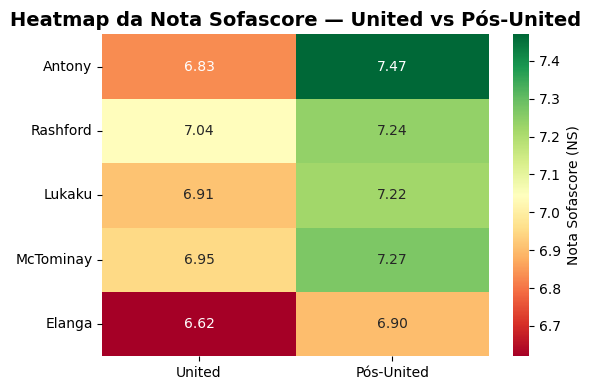

In [14]:
# Correção: não precisamos usar pivot, apenas set_index e selecionar colunas
import matplotlib.pyplot as plt

import pandas as pd

# Dados extraídos do gráfico anterior
data_heatmap = {
    'Jogador': ['Antony', 'Rashford', 'Lukaku', 'McTominay', 'Elanga'],
    'United': [6.83, 7.04, 6.91, 6.95, 6.62],
    'Pós-United': [7.47, 7.24, 7.22, 7.27, 6.90]
}

df_heatmap = pd.DataFrame(data_heatmap)

# Criar heatmap diretamente
heatmap_data = df_heatmap.set_index("Jogador")[["United", "Pós-United"]]

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': 'Nota Sofascore (NS)'})
plt.title("Heatmap da Nota Sofascore — United vs Pós-United", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
